> # Exploration of customer purchasing behavior

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('..')

In [2]:
train_path = r"C:\Users\HP\Desktop\Challenges\Rossmann-Pharmaceuticals\data\train.csv"
test_path = r"C:\Users\HP\Desktop\Challenges\Rossmann-Pharmaceuticals\data\test.csv"
store_path = r"C:\Users\HP\Desktop\Challenges\Rossmann-Pharmaceuticals\data\store.csv"

>> ### Load data

In [3]:
import os

print("Train path exists:", os.path.exists(train_path))
print("Test path exists:", os.path.exists(test_path))
print("Store path exists:", os.path.exists(store_path))


Train path exists: True
Test path exists: True
Store path exists: True


In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
store = pd.read_csv(store_path)


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\2322084708.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

>> ### Check Missing Value

In [10]:
from scripts.dataCleaning import check_missing_data
check_missing_data(test)

Open    11
dtype: int64

In [11]:
check_missing_data(train)

Series([], dtype: int64)

In [12]:
check_missing_data(store)

CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

>> ### Handle missing Value

In [13]:
test[test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [14]:
from scripts.dataCleaning import handle_missing_values_for_train
test = handle_missing_values_for_train(test)

In [15]:
check_missing_data(train)

Series([], dtype: int64)

In [16]:
from scripts.dataCleaning import handle_missing_values_for_store
store = handle_missing_values_for_store(store)

In [17]:
check_missing_data(store)

Series([], dtype: int64)

In [18]:
check_missing_data(test)

Series([], dtype: int64)

>> ### Detect outliers for train data

In [19]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

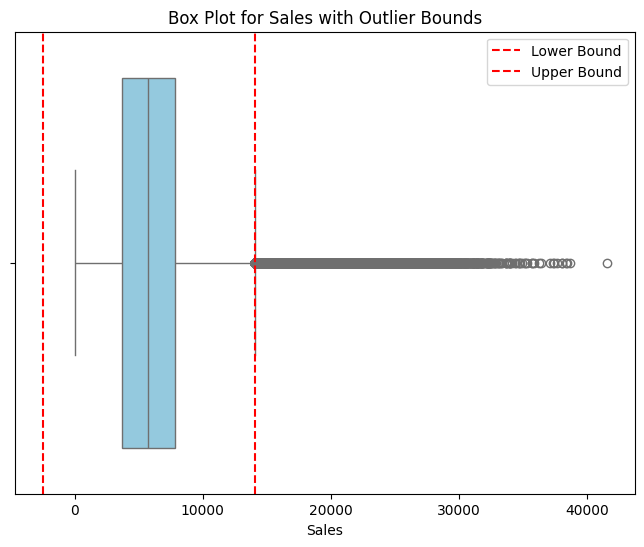

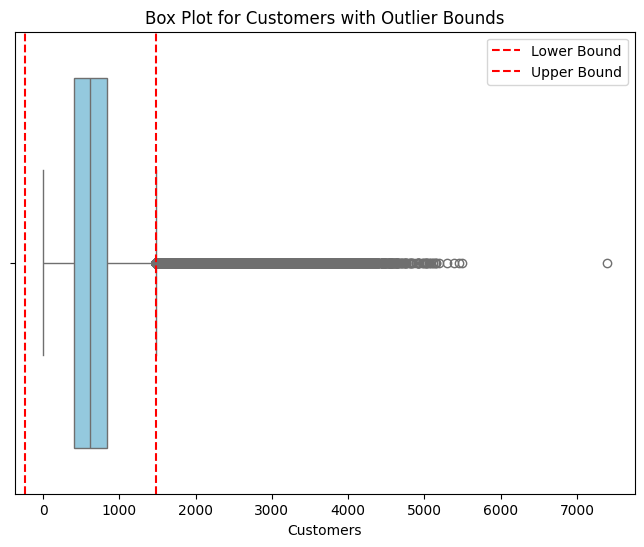

In [20]:
from scripts.dataCleaning import detect_outliers
column_to_detect = ['Sales', 'Customers']
outliers = detect_outliers(train, column_to_detect)

>> ### Cap outliers for tain data

In [21]:
from scripts.dataCleaning import cap_outliers

def ca(train, column_to_detect):
    for column in column_to_detect:
        train = cap_outliers(train, column)
    return train;
train = ca(train, column_to_detect)

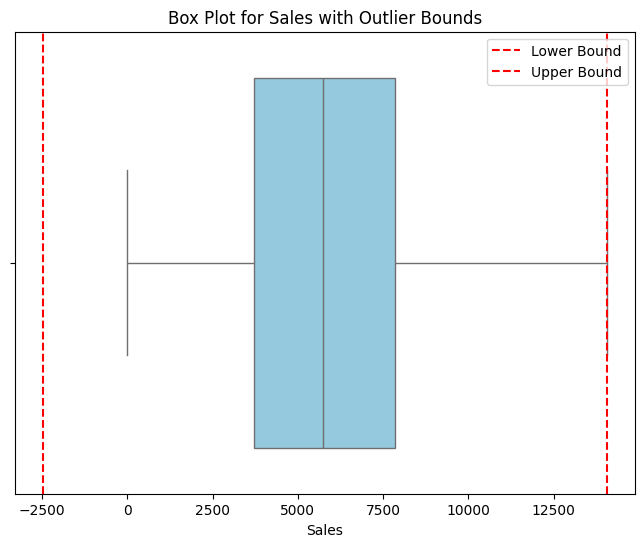

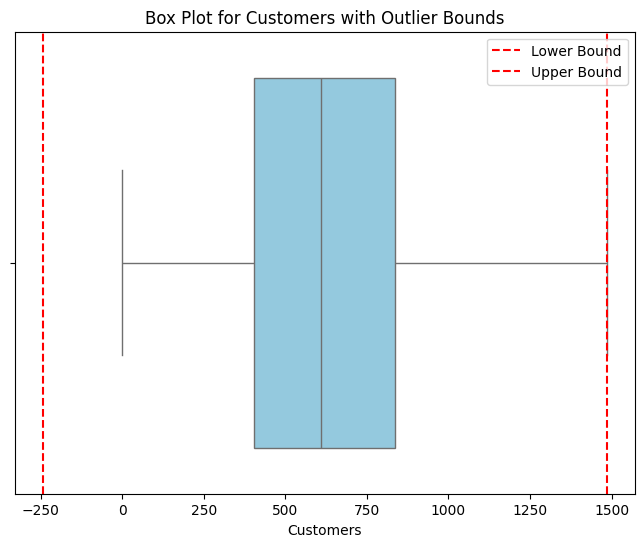

In [22]:
outliers = detect_outliers(train, column_to_detect)

>> ### Detect outliers for store

In [23]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

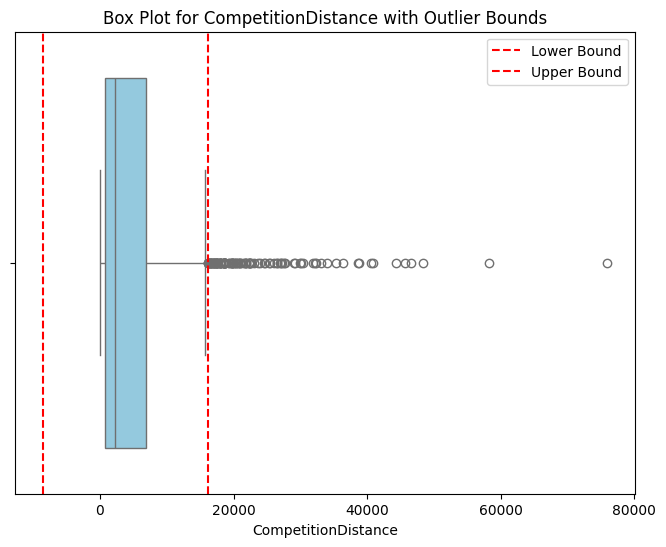

In [24]:
column = ['CompetitionDistance']
outliers = detect_outliers(store, column)

In [25]:
def cap(store, columns):
    for column in columns:
        store = cap_outliers(store, column)
    return store;
store = cap(store, column)

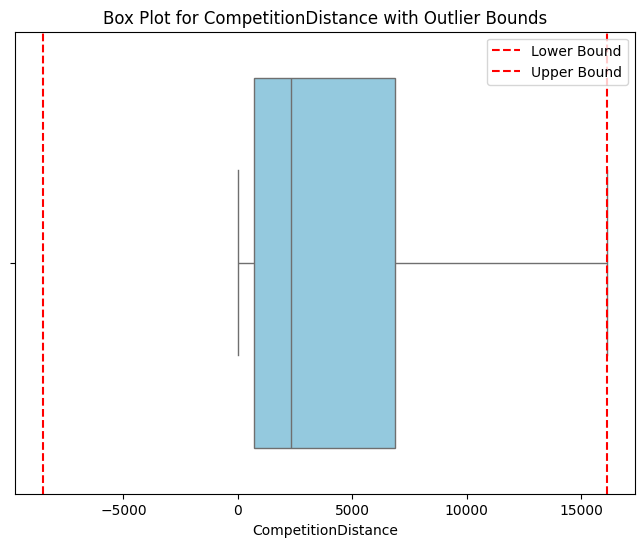

In [26]:
outliers = detect_outliers(store, column)

In [27]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,a,a,16107.5,4.0,2015.0,0,0.0,0.0,None


>> ### merge train and test data woth store

In [28]:
from scripts.dataLoadAndMerge import merge_data
trian_merged, test_merged = merge_data(train, test, store)

In [29]:
trian_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,16107.5,4.0,2015.0,0,0.0,0.0,None


In [30]:
test_merged.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,16107.5,4.0,2013.0,0,0.0,0.0,None
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,None
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,None


>> ### Feature Engineering


In [31]:
from scripts.dataCleaning import add_date_features
trian_merged = add_date_features(trian_merged)

In [32]:
test_merged = add_date_features(test_merged)

In [33]:
# trian_merged.to_csv("trainData.csv")
# test_merged.to_csv("testData.csv")

In [34]:
trian_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,None,2015,7,31,31
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,None,2015,7,31,31
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,None,2015,7,31,31


In [35]:
test_merged.head(0)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear


>> ### plot promo distribution

Train Promo Distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Test Promo Distribution:
Promo
0    0.604158
1    0.395842
Name: proportion, dtype: float64


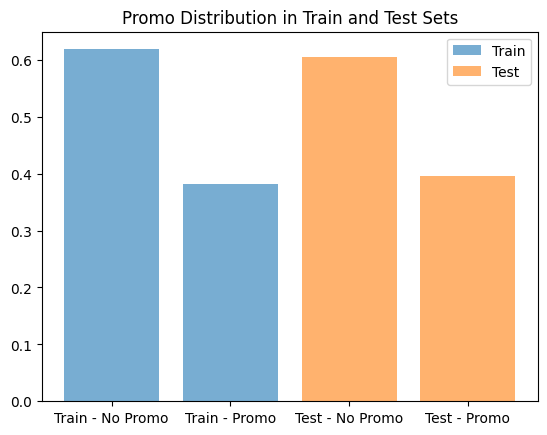

In [36]:
from scripts.checkPromoDistribution import check_promo_distribution
check_promo_distribution(trian_merged, test_merged)

>> ### Sales Before, During, and After Holidays

In [37]:
from scripts.analyzeHolidaySales import analyze_holiday_sales

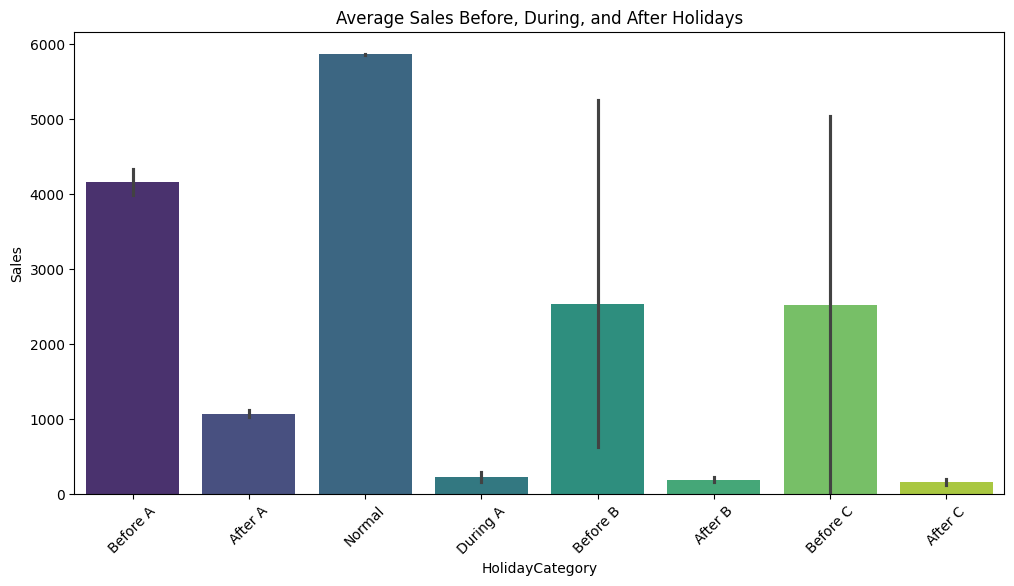

In [38]:
analyze_holiday_sales(trian_merged)

>> ### Seasonal Behavior 

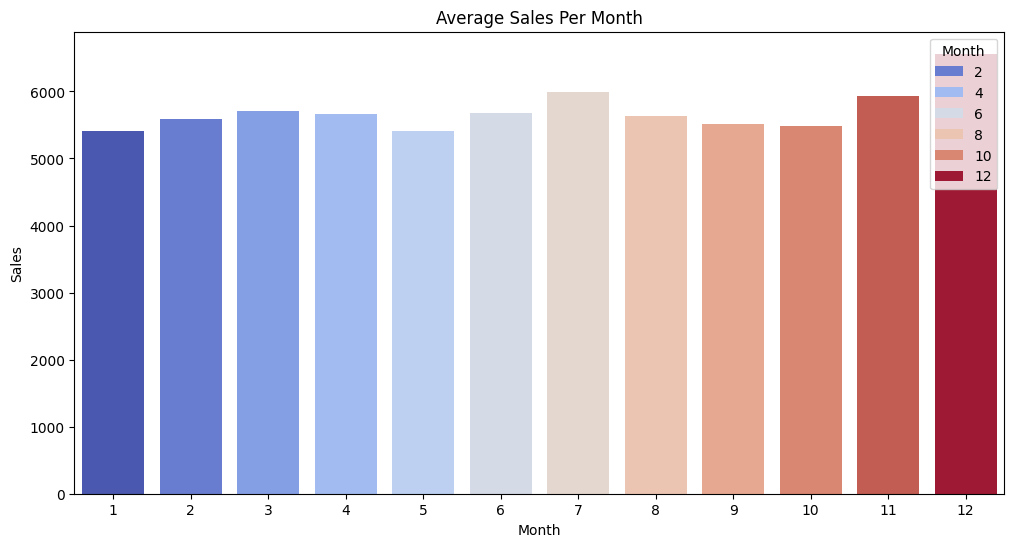

In [39]:
from scripts.analyzeSeasonality import analyze_seasonality
analyze_seasonality(trian_merged)

>> ### Correlation Analysis

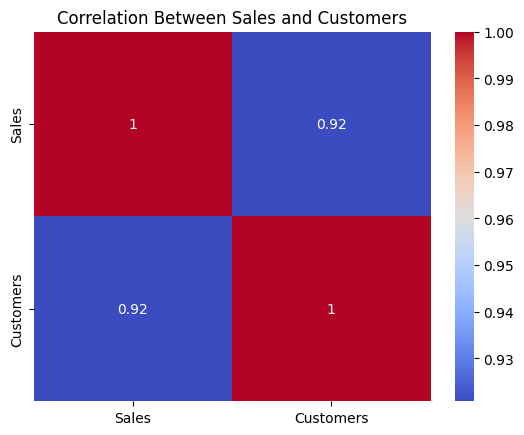

In [40]:
from scripts.correlationSalesCustomers import correlation_sales_customers
correlation_sales_customers(trian_merged)

>> ### effect of promo on sales

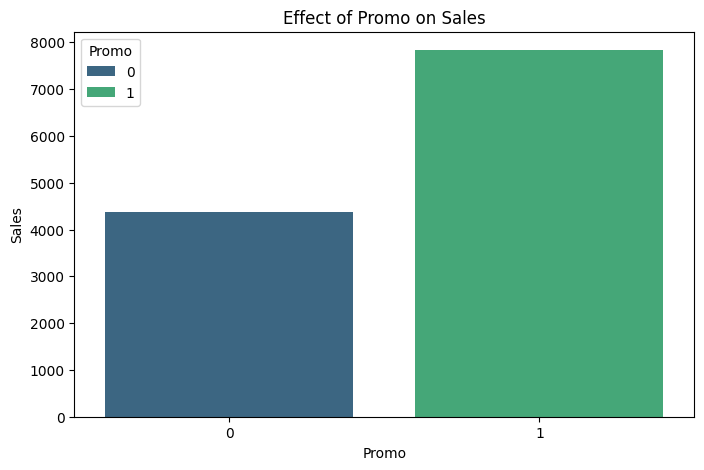

In [41]:
from scripts.promoEffectOnSales import promo_effect_on_sales
promo_effect_on_sales(trian_merged)

>> ### promo deployment recommendations

In [42]:
from scripts.promoDeploymentRecommendations import promo_deployment_recommendations
promo_deployment_recommendations(trian_merged)

Promo,0,1,Difference
Store,,,
261,6636.746564,13539.176389,6902.429825
963,5729.452749,12461.506944,6732.054195
876,4776.298969,11353.336111,6577.037142
375,4909.736254,11429.531944,6519.795690
726,6192.259450,12631.476389,6439.216939
1014,6771.820447,13158.006944,6386.186498
271,4008.640893,10330.906944,6322.266051
526,6143.203608,12396.180556,6252.976947
545,6205.571306,12329.944444,6124.373139


>> ### analyze store open close

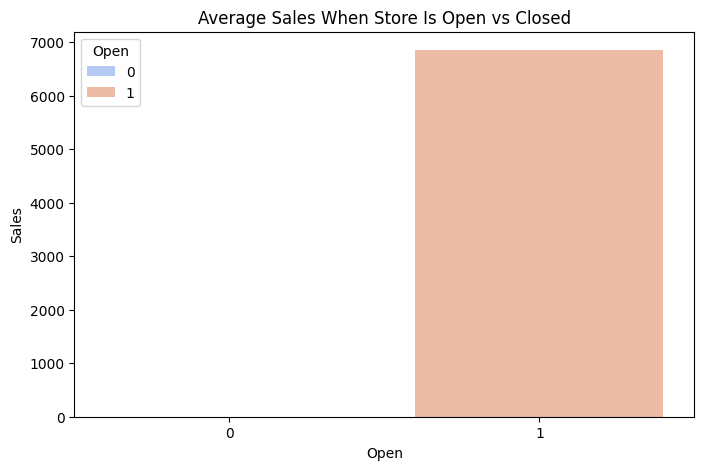

In [43]:
from scripts.analyzeStoreOpenClose import analyze_store_open_close
analyze_store_open_close(trian_merged)

>> ### analyze weekday weekend sales

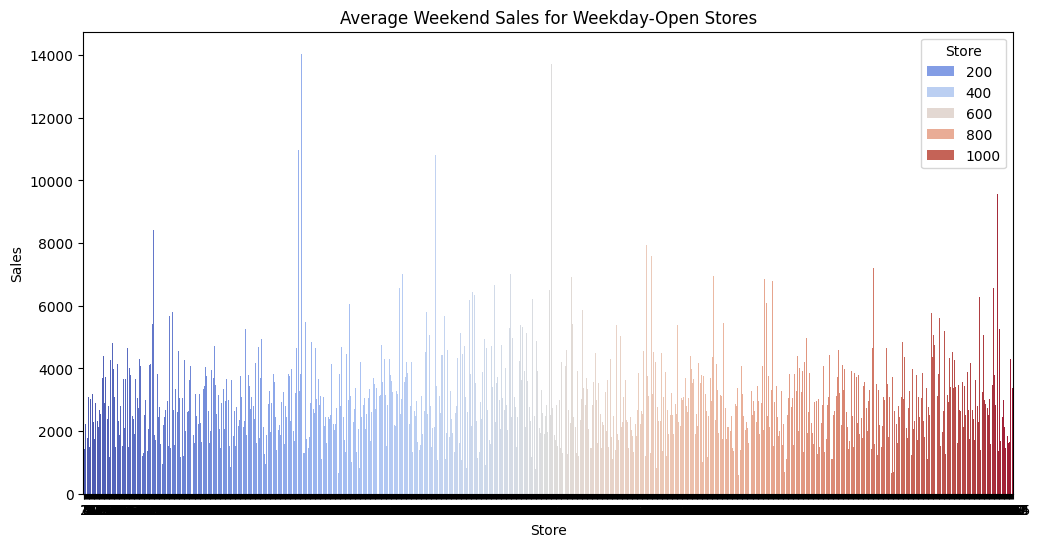

In [44]:
from scripts.analyzeWeekdayWeekendSales import analyze_weekday_weekend_sales
analyze_weekday_weekend_sales(trian_merged)

>> ### assortment type effect

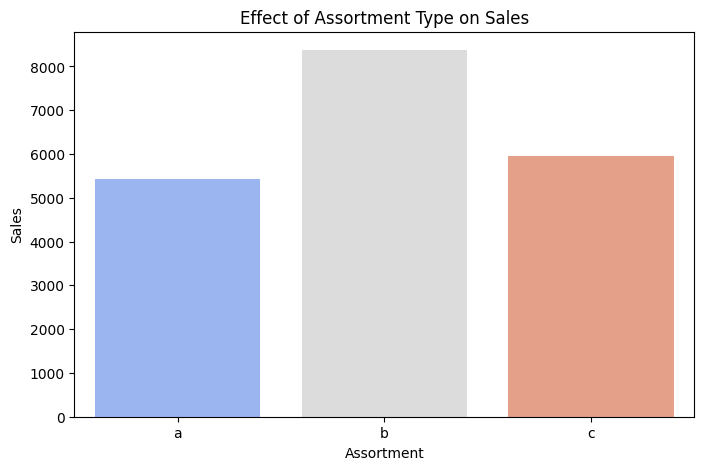

In [45]:
from scripts.assortmentTypeEffect import assortment_type_effect
assortment_type_effect(trian_merged)

>> ### competition distance effect

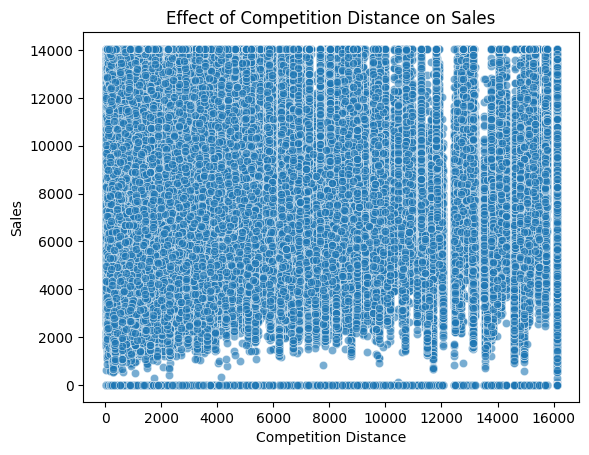

In [46]:
from scripts.competitionDistanceEffect import competition_distance_effect
competition_distance_effect(trian_merged)

>> ### competitor open reopen effect

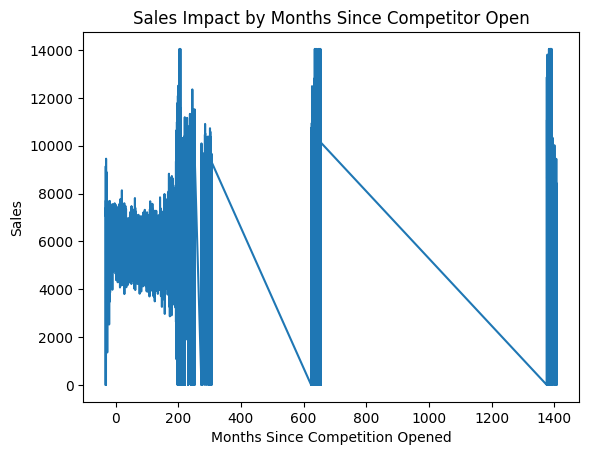

In [47]:
from scripts.competitorOpenReopenEffect import competitor_open_reopen_effect
competitor_open_reopen_effect(trian_merged)

In [48]:
trian_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitorOpen', 'MonthsSinceCompetition'],
      dtype='object')

In [49]:
check_missing_data(trian_merged)

CompetitorOpen    323348
dtype: int64